![](https://upload.wikimedia.org/wikipedia/commons/0/0a/Quantum_Full_Adder.png?20210806154655)

Exploring various ways to get the required test case states initialised: This is a very rough attempt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

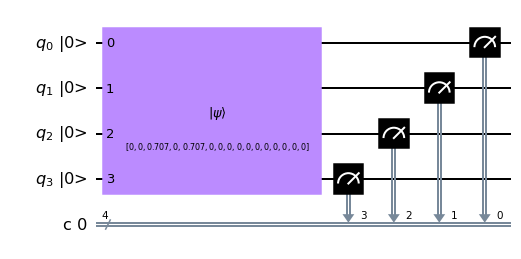

In [31]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
qc = QuantumCircuit(4,4)
initial_state = np.array([0, 0,1, 0,1,0,0,0,0,0,0,0,0,0,0,0], dtype=float)
initial_state /= np.linalg.norm(initial_state)
qc.initialize(initial_state)
# qc.x(1)
# qc.h(2)
# qc.cx(2,1)
qc.measure([3,2,1,0], [3,2,1,0])
qc.draw(plot_barriers=True, initial_state=True, scale=1,output='mpl')

In [32]:
simulator = Aer.get_backend('statevector_simulator')
statevector = execute(qc, simulator).result().get_statevector()
# normalized_statevector = statevector / (2 ** 0.5)
# print(normalized_statevector)
print(statevector)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [33]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'0010': 543, '0100': 481}


In [34]:
# Print the probabilities of all classical states
total_shots = sum(counts.values())
for classical_state in counts:
    probability = counts[classical_state] / total_shots
    print(f"Probability of |{classical_state}>: {probability}")

Probability of |0010>: 0.5302734375
Probability of |0100>: 0.4697265625


![](https://hackmd.io/_uploads/BJVOZkQD2.png)

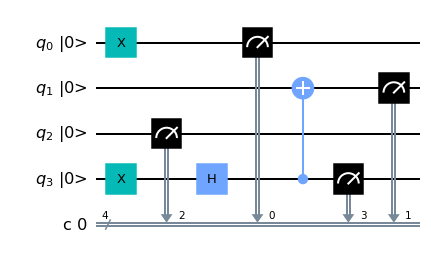

In [35]:
qc = QuantumCircuit(4,4)
qc.x(0)
qc.x(3)
qc.h(3)
qc.cx(3,1)
qc.measure([3,2,1,0], [3,2,1,0])
qc.draw(plot_barriers=True, initial_state=True, scale=1,output='mpl')

In [36]:
simulator = Aer.get_backend('statevector_simulator')
statevector = execute(qc, simulator).result().get_statevector()
normalized_statevector = statevector / (2 ** 0.5)
print(normalized_statevector)
print(statevector)

Statevector([ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.70710678-8.65956056e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2, 2))
Statevector([ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j, -1.-1.2246468e-16j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j],
 

In [37]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'0001': 524, '1011': 500}


In [38]:
# Print the probabilities of all classical states
total_shots = sum(counts.values())
for classical_state in counts:
    probability = counts[classical_state] / total_shots
    print(f"Probability of |{classical_state}>: {probability}")

Probability of |0001>: 0.51171875
Probability of |1011>: 0.48828125


In [39]:
# from qiskit import QuantumCircuit, transpile, assemble, Aer, execute

# # Create a 4-qubit quantum circuit
# qc = QuantumCircuit(4)

# # Apply X gates to set the desired initial states
# qc.x(1)  # |0010>
# qc.x(2)  # |0100>

# # Apply Hadamard gates to create superposition
# qc.h(range(4))

# # Normalize the state vector by dividing by sqrt(2)
# simulator = Aer.get_backend('statevector_simulator')
# job = execute(qc, simulator)
# result = job.result()
# statevector = result.get_statevector()

# normalized_statevector = statevector / (2 ** 0.5)

# print(normalized_statevector)

In [40]:
# Run the experimient 1024 times and get stats
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'0001': 510, '1011': 514}


In [41]:
# Print the probabilities of all classical states
total_shots = sum(counts.values())
for classical_state in counts:
    probability = counts[classical_state] / total_shots
    print(f"Probability of |{classical_state}>: {probability}")

Probability of |0001>: 0.498046875
Probability of |1011>: 0.501953125


![](https://hackmd.io/_uploads/rJZvMyXw3.png) 

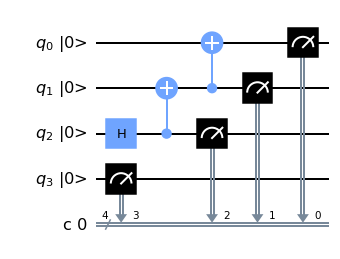

In [42]:
# B
qc = QuantumCircuit(4,4)
qc.h(2)
qc.cx(2,1)
qc.cx(1,0)
qc.measure([3,2,1,0], [3,2,1,0])
qc.draw(plot_barriers=True, initial_state=True, scale=1,output='mpl')

In [43]:
simulator = Aer.get_backend('statevector_simulator')
statevector = execute(qc, simulator).result().get_statevector()
normalized_statevector = statevector / (2 ** 0.5)
print(normalized_statevector)
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2, 2, 2))
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [44]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'0000': 509, '0111': 515}


In [45]:
# Print the probabilities of all classical states
total_shots = sum(counts.values())
for classical_state in counts:
    probability = counts[classical_state] / total_shots
    print(f"Probability of |{classical_state}>: {probability}")

Probability of |0000>: 0.4970703125
Probability of |0111>: 0.5029296875


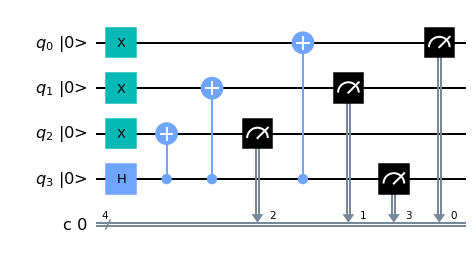

In [46]:
# B
qc = QuantumCircuit(4,4)
qc.x(0)
qc.x(1)
qc.x(2)
qc.h(3)
qc.cx(3,2)
qc.cx(3,1)
qc.cx(3,0)

qc.measure([3,2,1,0], [3,2,1,0])
qc.draw(plot_barriers=True, initial_state=True, scale=1,output='mpl')

In [47]:
simulator = Aer.get_backend('statevector_simulator')
statevector = execute(qc, simulator).result().get_statevector()
normalized_statevector = statevector / (2 ** 0.5)
print(normalized_statevector)
print(statevector)

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2, 2, 2))
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [48]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'1000': 521, '0111': 503}


In [49]:
# Print the probabilities of all classical states
total_shots = sum(counts.values())
for classical_state in counts:
    probability = counts[classical_state] / total_shots
    print(f"Probability of |{classical_state}>: {probability}")

Probability of |1000>: 0.5087890625
Probability of |0111>: 0.4912109375


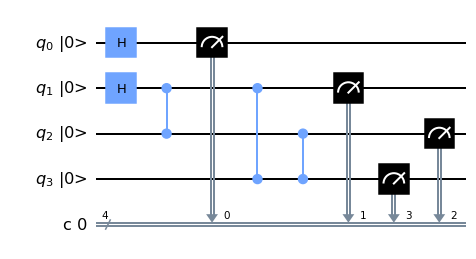

In [50]:
qc = QuantumCircuit(4,4)
qc.h(0)
qc.h(1)
# qc.h(2)
# qc.h(3)
qc.cz(1,2)
qc.cz(1,3)
qc.cz(2,3)
# qc.x(1)
# qc.h(2)
# qc.cx(2,1)
qc.measure([3,2,1,0], [3,2,1,0])
qc.draw(plot_barriers=True, initial_state=True, scale=1,output='mpl')

In [51]:
simulator = Aer.get_backend('statevector_simulator')
statevector = execute(qc, simulator).result().get_statevector()
normalized_statevector = statevector / (2 ** 0.5)
print(normalized_statevector)
print(statevector)

Statevector([ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
             -0.        +0.j, -0.        +0.j,  0.        +0.j,
              0.        +0.j, -0.        +0.j, -0.        +0.j,
             -0.        +0.j, -0.        +0.j,  0.        +0.j,
              0.        +0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,
             -0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
              0.+0.j,  0.+0.j],
            dims=(2, 2, 2, 2))


In [52]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'0011': 258, '0000': 244, '0001': 265, '0010': 257}


In [53]:
# Print the probabilities of all classical states
total_shots = sum(counts.values())
for classical_state in counts:
    probability = counts[classical_state] / total_shots
    print(f"Probability of |{classical_state}>: {probability}")

Probability of |0011>: 0.251953125
Probability of |0000>: 0.23828125
Probability of |0001>: 0.2587890625
Probability of |0010>: 0.2509765625


# Single Qubit adder

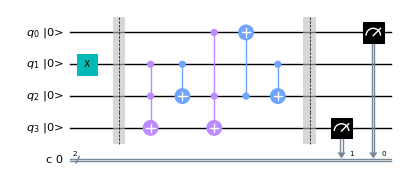

In [54]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

# Create a quantum circuit with 5 qubits (2 input bits, 2 output bits, and 1 carry bit)
qc = QuantumCircuit(4, 2)
A = '1'
B = '0'
for i, bit in enumerate(A):
    if bit == '1':
        qc.x(3*i+1)
        
for i, bit in enumerate(B):
    if bit == '1':
        qc.x(3*i+2)

qc.barrier()
qc.ccx(1,2,3)
qc.cx(1,2)
qc.ccx(0,2,3)
qc.cx(2,0)
qc.cx(1,2)
qc.barrier()

# Measure the output bits
qc.measure([3,0], [1,0])
qc.draw(plot_barriers=True, initial_state=True, scale=0.7,output='mpl')

In [55]:
# Run the experimient 1024 times and get stats
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'01': 1024}


In [56]:
for i, bit in enumerate(A):
    if bit == '1':
        # qc.x(3*i+1)  
        print(3*i+1)
        # print(A)

1


# Double Qubit adder

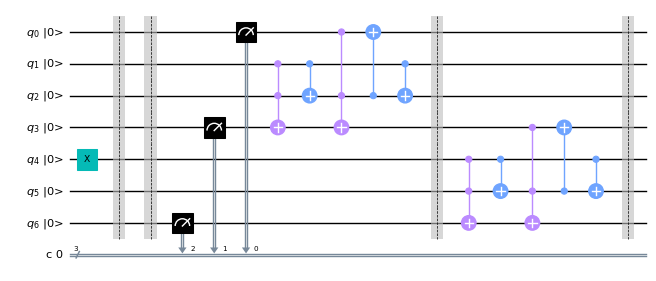

In [57]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

# Create a quantum circuit with 5 qubits (2 input bits, 2 output bits, and 1 carry bit)
qc = QuantumCircuit(7, 3)
A = '01'
B = '00'
for i, bit in enumerate(A):
    if bit == '1':
        qc.x(3*i+1)    
for i, bit in enumerate(B):
    if bit == '1':
        qc.x(3*i+2)

qc.barrier()
qc.barrier()
qc.measure([6,3,0], [2,1,0])
qc.ccx(1,2,3)
qc.cx(1,2)
qc.ccx(2,0,3)
qc.cx(2,0)
qc.cx(1,2)
qc.barrier()
qc.ccx(1+3,2+3,3+3)
qc.cx(1+3,2+3)
qc.ccx(0+3,2+3,3+3)
qc.cx(2+3,0+3)
qc.cx(1+3,2+3)
qc.barrier()
# Measure the output bits
# qc.measure([6,3,0], [2,1,0])
qc.draw(plot_barriers=True, initial_state=True, scale=0.7,output='mpl')


In [58]:
# Run the experimient 1024 times and get stats
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'000': 1024}


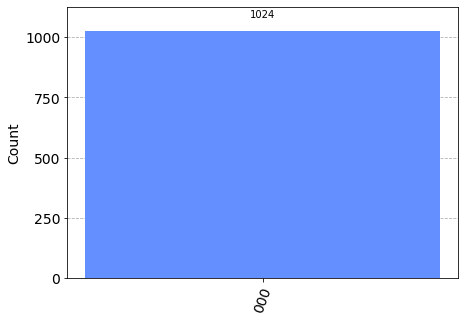

In [59]:
plot_histogram(counts)

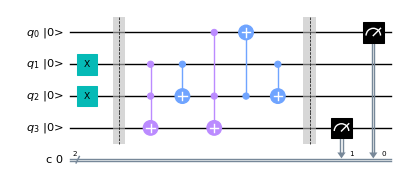

In [60]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

# Create a quantum circuit with 5 qubits (2 input bits, 2 output bits, and 1 carry bit)
qc = QuantumCircuit(4, 2)

# the input values (A = 1101, B = 0111)
A = '1'
B = '1'

# Encode the input values onto the quantum state

# qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
# qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
# qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
# qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
# qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
# qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
# qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
# qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)

for i, bit in enumerate(A):
    if bit == '1':
        qc.x(3*i+1)
        
for i, bit in enumerate(B):
    if bit == '1':
        qc.x(3*i+2)

# A single Full Adder ckt using CNOT (cx) and Toffoli (ccx) gates



qc.barrier()
qc.ccx(1,2,3)
qc.cx(1,2)
qc.ccx(0,2,3)
qc.cx(2,0)
qc.cx(1,2)
qc.barrier()
# qc.ccx(1+3,2+3,3+3)
# qc.cx(1+3,2+3)
# qc.ccx(0+3,2+3,3+3)
# qc.cx(2+3,0+3)
# qc.cx(1+3,2+3)
# qc.barrier()
# qc.ccx(1+6,2+6,3+6)
# qc.cx(1+6,2+6)
# qc.ccx(0+6,2+6,3+6)
# qc.cx(2+6,0+6)
# qc.cx(1+6,2+6)
# qc.barrier()
# qc.ccx(1+9,2+9,3+9)
# qc.cx(1+9,2+9)
# qc.ccx(0+9,2+9,3+9)
# qc.cx(2+9,0+9)
# qc.cx(1+9,2+9)
# qc.barrier()

# Measure the output bits
# qc.measure([12,9,6,3,0], [4,3,2,1,0])
qc.measure([3,0], [1,0])
qc.draw(plot_barriers=True, initial_state=True, scale=0.7,output='mpl')